# Import necessary libraries

In [1]:
# Common libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import copy

In [16]:
def result(n):
  sum = 0.0

  for i in range(1, n+1):
    term = 1 if i % 2 == 0 else -1
    addition = float(term) / float(i ** float(1/i))

    sum += addition

  return sum

In [19]:
for i in range(1, 1000):
  print(i, result(i))

1 -1.0
2 -0.29289321881345254
3 -0.9862544931640873
4 -0.27914771197753985
5 -1.0039273756552354
6 -0.2620910000648331
7 -1.0193975421893864
8 -0.248292129485416
9 -1.0316731664226884
10 -0.23734493169840687
11 -1.041478029202071
12 -0.22851980390180104
13 -1.0494610000781612
14 -0.2212638880908765
15 -1.0560859468917567
16 -0.2151895316380421
17 -1.0616772311809333
18 -0.21002431350518413
19 -1.066464779086181
20 -0.20557311975444625
21 -1.0706150846134168
22 -0.2016930964393724
23 -1.0742513721634537
24 -0.198277407856168
25 -1.0774667193970577
26 -0.1952445882478162
27 -1.0803327403192764
28 -0.1925314240239624
29 -1.0829054511773883
30 -0.19008809381630498
31 -1.085229317983288
32 -0.18787478048173423
33 -1.0873401063260548
34 -0.18585926270846131
35 -1.0892669259003216
36 -0.18401517188486927
37 -1.0910337228091556
38 -0.1823207094876268
39 -1.092660386110045
40 -0.18075768898884736
41 -1.0941635802323637
42 -0.1793108102426777
43 -1.0955573794873752
44 -0.17796710296300755
45 -1.

In [ ]:
A_arr = [[2, 1],[1, 2]]
b_arr = [[1],[3]]

A = np.array(A_arr)
b = np.array(b_arr)

def f(x):
  return x.T @ A @ x + b.T @ x + 2

def VP(x, t):
  return -0.4 * t * (2 * x.T @ A @ x + 2 * b.T @ x + 7/3)

In [ ]:
np.linalg.inv(2*A) @ b

array([[-0.16666667],
       [ 0.83333333]])

In [ ]:
f(np.array([[-117/20], [-99/20]]))

array([[156.665]])

In [ ]:
VP(np.array([[-3], [-3]]), 0.9)

array([[-31.08]])

In [ ]:
b.T @ np.linalg.inv(2*A) @ b

array([[2.33333333]])

In [ ]:
A.T @ np.linalg.inv(2*A) @ b

array([[0.5],
       [1.5]])

In [ ]:
2*A

array([[4, 2],
       [2, 4]])

In [ ]:
# Scikit-learn
import sklearn as skl
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import confusion_matrix, roc_auc_score, accuracy_score
from sklearn import svm
from sklearn.inspection import permutation_importance

from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
# Torch
import torch
import torch.nn as nn
import torch.optim as optim

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data Preprocessing


In [ ]:
# Path to the data
data_folder = "/content/drive/MyDrive/ML - Bài tập nhóm/Datasets"

# -------> Change name of dataset HERE <-------
data_file = "output.csv"

# Join path
data_path = os.path.join(data_folder, data_file)
data_path

'/content/drive/MyDrive/ML - Bài tập nhóm/Datasets/output.csv'

In [ ]:
df = pd.read_csv(data_path)
df.head()

,gender,age,nationality,sport,university_grade,debateclub_exp,programming_exp,international_exp,ind-entrepeneur_exp,languages,exact_study,degree,company,decision
0,female,24,German,Swimming,70,False,False,False,False,1,True,phd,A,True
1,male,26,German,Golf,67,False,True,False,False,2,True,bachelor,A,False
2,female,23,Dutch,Running,67,False,True,True,False,0,True,master,A,False
3,male,24,Dutch,Cricket,70,False,True,False,False,1,True,master,A,True
4,female,26,German,Golf,59,False,False,False,False,1,False,master,A,True


In [ ]:
df["age"].value_counts()

28    549
26    545
27    529
25    409
24    403
30    289
29    279
22    254
21    247
23    226
32    127
31    104
Name: age, dtype: int64

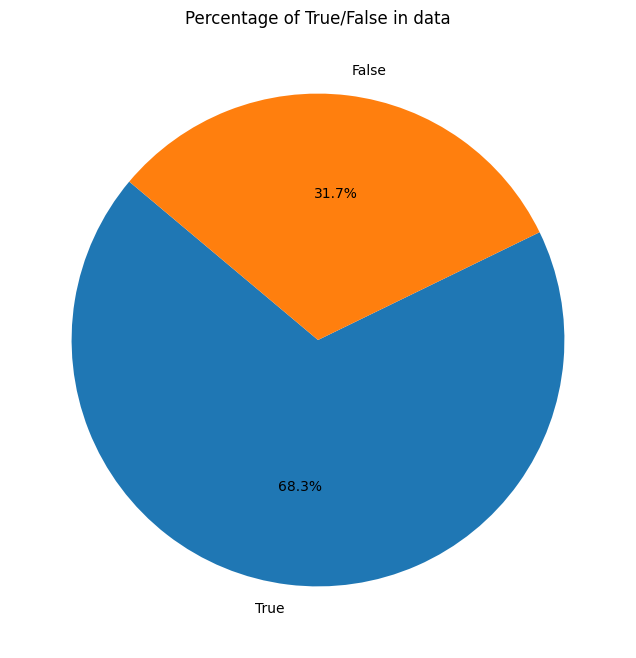

In [ ]:
plt.figure(figsize=(8, 8))
plt.pie(df.groupby("decision").size(), labels=df['decision'].unique(), autopct='%1.1f%%', startangle=140)
plt.title('Percentage of True/False in data')
plt.show()


In [ ]:
unimportant_cols = ["exact_study", "programming_exp"]
df = df.drop(unimportant_cols, axis=1)
df.head()

,gender,age,nationality,sport,university_grade,debateclub_exp,international_exp,ind-entrepeneur_exp,languages,degree,company,decision
0,female,24,German,Swimming,70,False,False,False,1,phd,A,True
1,male,26,German,Golf,67,False,False,False,2,bachelor,A,False
2,female,23,Dutch,Running,67,False,True,False,0,master,A,False
3,male,24,Dutch,Cricket,70,False,False,False,1,master,A,True
4,female,26,German,Golf,59,False,False,False,1,master,A,True


In [ ]:
def one_hot(dataset, continuous):
  df_continuous = dataset[continuous]
  df_onehoted = dataset.drop(continuous, axis=1)

  enc = OneHotEncoder(handle_unknown='ignore', drop='if_binary')
  transformed = enc.fit_transform(df_onehoted)

  #print(transformed)

  feature_names = enc.get_feature_names_out([x for x in dataset.columns if x not in continuous])

  df_categorical = pd.DataFrame(transformed.toarray(), columns=feature_names, index=dataset.index)

  df_onehoted = pd.concat([df_continuous, df_categorical], axis=1)
  #df_onehoted = df_onehoted.drop(["Id"], axis=1)

  return df_onehoted

In [ ]:
df_onehoted = one_hot(dataset=df, continuous=["age", "university_grade", "languages", "decision"])
df_onehoted

,age,university_grade,languages,decision,gender_female,gender_male,gender_other,nationality_Belgian,nationality_Dutch,nationality_German,...,debateclub_exp_True,international_exp_True,ind-entrepeneur_exp_True,degree_bachelor,degree_master,degree_phd,company_A,company_B,company_C,company_D
0,24,70,1,True,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,26,67,2,False,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,23,67,0,False,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,24,70,1,True,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,26,59,1,True,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3956,28,63,0,False,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3957,27,62,2,False,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3958,24,60,2,False,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3959,22,66,1,False,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
df["degree"].value_counts()
# df['gender'].value_counts()
# df['decision'].value_counts()

bachelor    1965
master      1749
phd          247
Name: degree, dtype: int64

In [ ]:
sensitive_features = ["gender", "nationality", "age"]

In [ ]:
# Standardize GPA feature
# Note: Standardize each dataset separatedly to avoid data leakage

def standardize(dataset):
  standard = StandardScaler()
  minmax = MinMaxScaler()
  df_standard = dataset[["university_grade"]]
  standardize = standard.fit_transform(df_standard)

  df_no_standardize = dataset.drop(["university_grade"], axis=1)

  if "age" in dataset.columns:
    df_no_standardize = dataset.drop(["age"], axis=1)


  df_new_standard = pd.DataFrame(standardize, columns=["university_grade"], index=df_no_standardize.index)
  df_new = pd.concat([df_new_standard, df_no_standardize], axis=1)

  if "age" in dataset.columns:
    df_minmax = dataset[["age"]]
    minmaxize = minmax.fit_transform(df_minmax)
    df_new_minmax = pd.DataFrame(minmaxize, columns=["age"], index=df_no_standardize.index)
    df_new = pd.concat([df_new_minmax, df_new], axis=1)

  return df_new

In [ ]:
df_onehot_standardize = standardize(dataset=df_onehoted)
df_onehot_standardize

,age,university_grade,university_grade,languages,decision,gender_female,gender_male,gender_other,nationality_Belgian,nationality_Dutch,...,debateclub_exp_True,international_exp_True,ind-entrepeneur_exp_True,degree_bachelor,degree_master,degree_phd,company_A,company_B,company_C,company_D
0,0.272727,1.286892,70,1,True,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,0.454545,0.779589,67,2,False,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.181818,0.779589,67,0,False,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,0.272727,1.286892,70,1,True,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.454545,-0.573218,59,1,True,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3956,0.636364,0.103185,63,0,False,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3957,0.545455,-0.065916,62,2,False,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3958,0.272727,-0.404117,60,2,False,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3959,0.090909,0.610488,66,1,False,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(df.loc[:, df.columns != "decision"], df["decision"], test_size=0.2, random_state=100)
X_train_orig.head()

,gender,age,nationality,sport,university_grade,debateclub_exp,international_exp,ind-entrepeneur_exp,languages,degree,company
3796,male,25,Dutch,Football,76,False,False,True,2,master,D
1722,male,24,Belgian,Cricket,62,True,False,True,2,bachelor,B
1423,male,27,Dutch,Rugby,63,True,False,True,1,master,B
2424,female,30,Belgian,Swimming,62,False,False,False,2,bachelor,C
2100,male,23,German,Tennis,69,False,False,False,2,bachelor,C


In [ ]:
X_train_orig_no_sensitive = X_train_orig.drop(sensitive_features, axis=1)
X_test_orig_no_sensitive = X_test_orig.drop(sensitive_features, axis=1)
X_train_orig_no_sensitive.head()

,sport,university_grade,debateclub_exp,international_exp,ind-entrepeneur_exp,languages,degree,company
3796,Football,76,False,False,True,2,master,D
1722,Cricket,62,True,False,True,2,bachelor,B
1423,Rugby,63,True,False,True,1,master,B
2424,Swimming,62,False,False,False,2,bachelor,C
2100,Tennis,69,False,False,False,2,bachelor,C


In [ ]:
#X_train_orig = standardize(X_train_orig)
#X_test_orig = standardize(X_test_orig)
#X_train_orig_no_sensitive = standardize(X_train_orig_no_sensitive)
#X_test_orig_no_sensitive = standardize(X_test_orig_no_sensitive)

In [ ]:
continuous = ["age", "university_grade", "languages"]
X_train = np.array(standardize(dataset=one_hot(dataset=X_train_orig, continuous=continuous)).values)
X_test = np.array(standardize(dataset=one_hot(dataset=X_test_orig, continuous=continuous)).values)
y_train = np.array(y_train_orig.values)
y_test = np.array(y_test_orig.values)
X_train

array([[ 3.63636364e-01,  2.30966993e+00,  7.60000000e+01, ...,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [ 2.72727273e-01, -6.07132785e-02,  6.20000000e+01, ...,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 5.45454545e-01,  1.08599808e-01,  6.30000000e+01, ...,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 7.27272727e-01, -9.07278711e-01,  5.70000000e+01, ...,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.00000000e+00,  4.47225981e-01,  6.50000000e+01, ...,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  2.30966993e+00,  7.60000000e+01, ...,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [ ]:
continuous_no_sensitive = ["university_grade", "languages"]
X_train_no_sensitive = np.array(standardize(dataset=one_hot(dataset=X_train_orig_no_sensitive, continuous=continuous_no_sensitive)).values)
X_test_no_sensitive = np.array(standardize(dataset=one_hot(dataset=X_test_orig_no_sensitive, continuous=continuous_no_sensitive)).values)

In [ ]:
X_train_no_sensitive

array([[ 2.30966993,  2.        ,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       [-0.06071328,  2.        ,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       [ 0.10859981,  1.        ,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [-0.90727871,  3.        ,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       [ 0.44722598,  0.        ,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 2.30966993,  1.        ,  1.        , ...,  1.        ,
         0.        ,  0.        ]])

# Model Definition

Input:

X_train, X_test, y_train, y_test: numpy array

X_train_no_sensitive, X_test_no_sensitive: numpy array (without sensitive features)

Output:

y_prob, y_prob_no_sensitive: numpy array

## Basic Deep Neural Network

In [ ]:
# Model definition
model = nn.Sequential(
    nn.Linear(29, 12).double(),
    nn.ReLU().double(),
    nn.Linear(12, 6).double(),
    nn.ReLU().double(),
    nn.Linear(6, 1).double(),
    nn.Sigmoid()
)

print(model)

# Model definition
model_no_sensitive = nn.Sequential(
    nn.Linear(22, 12).double(),
    nn.ReLU().double(),
    nn.Linear(12, 6).double(),
    nn.ReLU().double(),
    nn.Linear(6, 1).double(),
    nn.Sigmoid()
)

print(model_no_sensitive)

Sequential(
  (0): Linear(in_features=29, out_features=12, bias=True)
  (1): ReLU()
  (2): Linear(in_features=12, out_features=6, bias=True)
  (3): ReLU()
  (4): Linear(in_features=6, out_features=1, bias=True)
  (5): Sigmoid()
)
Sequential(
  (0): Linear(in_features=22, out_features=12, bias=True)
  (1): ReLU()
  (2): Linear(in_features=12, out_features=6, bias=True)
  (3): ReLU()
  (4): Linear(in_features=6, out_features=1, bias=True)
  (5): Sigmoid()
)


In [ ]:
# Loss function
criterion = nn.BCELoss()  # binary cross entropy
optimizer = optim.Adam(model.parameters(), lr=0.001)
optimizer_no_sensitive = optim.Adam(model_no_sensitive.parameters(), lr=0.001)

## Basic Logistic Regression

In [ ]:
clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train)
y_prob = clf.predict_proba(X_test)[:, 1]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
clf_no_sensitive = LogisticRegression(random_state=0)
clf_no_sensitive.fit(X_train_no_sensitive, y_train)
y_prob_no_sensitive = clf_no_sensitive.predict_proba(X_test_no_sensitive)[:, 1]

In [ ]:
y_prob_df = pd.DataFrame(y_prob, columns=["probability"], index=y_test_orig.index)
df_comb = pd.concat([X_test_orig, y_test_orig, y_prob_df], axis=1)

df_comb.to_csv(os.path.join(data_folder, "LR_output.csv"))

In [ ]:
y_prob_df_no_sensitive = pd.DataFrame(y_prob_no_sensitive, columns=["probability"], index=y_test_orig.index)
df_comb_no_sensitive = pd.concat([X_test_orig, y_test_orig, y_prob_df_no_sensitive], axis=1)

df_comb_no_sensitive.to_csv(os.path.join(data_folder, "LR_output_no_sensitive.csv"))

## Support vector machine - Andy

Remember the input and output forms are above

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.inspection import permutation_importance

In [ ]:
# C_range = np.logspace(-2, 2, 5)
# param_grid = {'C': C_range}

# grid_search = GridSearchCV(svm.SVC(kernel='linear'), param_grid, cv=5)
# grid_search.fit(X_train, y_train)

# best_params = grid_search.best_params_

# print("Best C:", best_params['C'])
# best_model = grid_search.best_estimator_

# y_pred = best_model.predict(X_test)
# y_prob = best_model.decision_function(X_test)

# # Best C: 10

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [ ]:
clf = svm.SVC(kernel='linear', C=10)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
dist = clf.decision_function(X_test)
y_prob = sigmoid(dist)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7225725094577553


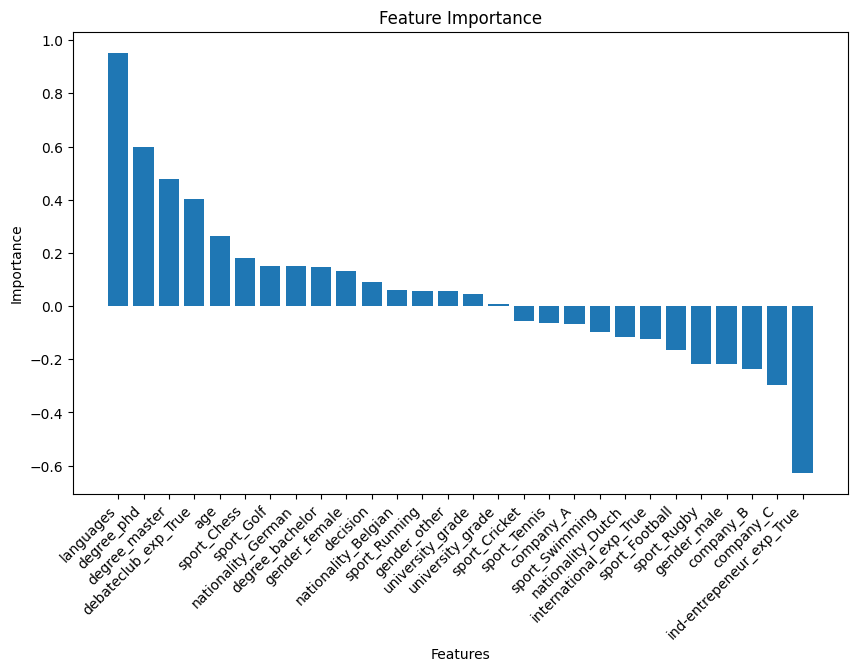

In [ ]:
# Get feature importances from the coefficients
feature_importances = clf.coef_[0]

# Sorting
sorted_indices = feature_importances.argsort()[::-1]
sorted_feature_importances = feature_importances[sorted_indices]
sorted_features = df_onehot_standardize.columns[sorted_indices]

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_feature_importances)), sorted_feature_importances, tick_label=sorted_features)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.xticks(rotation=45, ha="right")
plt.show()

In [ ]:
clf = svm.SVC(kernel='linear', C=10)
clf.fit(X_train_no_sensitive, y_train)

y_pred = clf.predict(X_test_no_sensitive)
dist = clf.decision_function(X_test_no_sensitive)
y_prob_no_sensitive = sigmoid(dist)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.725094577553594


In [ ]:
y_prob_df = pd.DataFrame(y_prob, columns=["probability"], index=y_test_orig.index)
df_comb = pd.concat([X_test_orig, y_test_orig, y_prob_df], axis=1)

df_comb.to_csv(os.path.join(data_folder, "SVM_output.csv"))

In [ ]:
y_prob_df_no_sensitive = pd.DataFrame(y_prob_no_sensitive, columns=["probability"], index=y_test_orig.index)
df_comb_no_sensitive = pd.concat([X_test_orig, y_test_orig, y_prob_df_no_sensitive], axis=1)

df_comb_no_sensitive.to_csv(os.path.join(data_folder, "SVM_output_no_sensitive.csv"))

In [ ]:
# param_grid = {'C': [1, 10, 100],
#               'gamma': [0.01, 0.1, 1],}

# grid_search = GridSearchCV(svm.SVC(kernel='rbf'), param_grid, cv=5)
# grid_search.fit(X_train, y_train)

# best_params = grid_search.best_params_

# print("Best C:", best_params['C'])
# print("Best gamma:", best_params['gamma'])

# best_model = grid_search.best_estimator_

# y_pred = best_model.predict(X_test)
# y_prob = best_model.decision_function(X_test)

# # Best C: 1
# # Best gamma: 0.1

In [ ]:
clf = svm.SVC(kernel='rbf', C=1, gamma=0.1)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
dist = clf.decision_function(X_test)
y_prob = sigmoid(dist)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8247162673392182


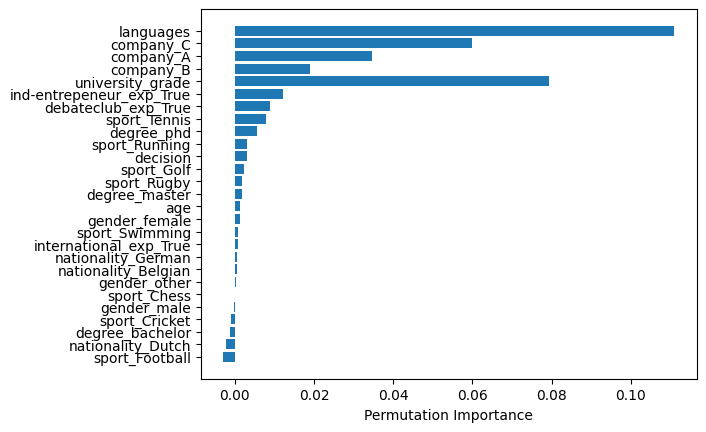

In [ ]:
# Get features importance
features = np.array(df_onehot_standardize.columns)
perm_importance = permutation_importance(clf, X_test, y_test, n_repeats=20)

# Sort the importances
sorted_idx = np.argsort(perm_importance.importances_mean)

# Plotting
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")
plt.show()

In [ ]:
clf_no_sensitive = svm.SVC(kernel='rbf', C=1, gamma=0.1)
clf_no_sensitive.fit(X_train_no_sensitive, y_train)

y_pred = clf_no_sensitive.predict(X_test_no_sensitive)
dist = clf_no_sensitive.decision_function(X_test_no_sensitive)
y_prob_no_sensitive = sigmoid(dist)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8448928121059268


In [ ]:
y_prob_df = pd.DataFrame(y_prob, columns=["probability"], index=y_test_orig.index)
df_comb = pd.concat([X_test_orig, y_test_orig, y_prob_df], axis=1)

df_comb.to_csv(os.path.join(data_folder, "SVM_rbf_output.csv"))

In [ ]:
y_prob_df_no_sensitive = pd.DataFrame(y_prob_no_sensitive, columns=["probability"], index=y_test_orig.index)
df_comb_no_sensitive = pd.concat([X_test_orig, y_test_orig, y_prob_df_no_sensitive], axis=1)

df_comb_no_sensitive.to_csv(os.path.join(data_folder, "SVM_rbf_output_no_sensitive.csv"))

## Polynomial Regression

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression

In [ ]:
# param_grid = {
#     'polynomialfeatures__degree': [2, 3, 4],
#     'logisticregression__C': [0.1, 1.0, 10.0],
#     'logisticregression__penalty': ['l1', 'l2'],
# }

# degree = 2  # Default degree
# clf = make_pipeline(
#     PolynomialFeatures(degree),
#     LogisticRegression(solver='liblinear', max_iter=1000)
# )

# grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')
# grid_search.fit(X_train, y_train)

# # Get the best parameters
# best_params = grid_search.best_params_
# print("Best Hyperparameters:", best_params)

# # Best Hyperparameters: {'logisticregression__C': 0.1, 'logisticregression__penalty': 'l1', 'polynomialfeatures__degree': 4}

In [ ]:
degree = 4
clf = make_pipeline(PolynomialFeatures(degree), LogisticRegression(solver='liblinear', penalty='l1', C=0.1))
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.8184110970996217


In [ ]:
degree = 4
clf_no_sensitive = make_pipeline(PolynomialFeatures(degree), LogisticRegression(solver='liblinear', penalty='l1', C=0.1))
clf_no_sensitive.fit(X_train_no_sensitive, y_train)
y_pred_no_sensitive = clf_no_sensitive.predict(X_test_no_sensitive)
y_prob_no_sensitive = clf_no_sensitive.predict_proba(X_test_no_sensitive)[:, 1]

# accuracy = accuracy_score(y_test, y_pred)
# print(f'Accuracy: {accuracy}')

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.8184110970996217


In [ ]:
y_prob_df = pd.DataFrame(y_prob, columns=["probability"], index=y_test_orig.index)
df_comb = pd.concat([X_test_orig, y_test_orig, y_prob_df], axis=1)

df_comb.to_csv(os.path.join(data_folder, "poly_output.csv"))

In [ ]:
y_prob_df_no_sensitive = pd.DataFrame(y_prob_no_sensitive, columns=["probability"], index=y_test_orig.index)
df_comb_no_sensitive = pd.concat([X_test_orig, y_test_orig, y_prob_df_no_sensitive], axis=1)

df_comb_no_sensitive.to_csv(os.path.join(data_folder, "poly_no_sensitive_output.csv"))

## Decision tree - Kat

Remember the input and output forms are above

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [ ]:
# clf = DecisionTreeClassifier(criterion="gini", max_depth=3)
# Accuracy: 0.6737841043890866

In [ ]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)
# Accuracy: 0.7022538552787663
# Note: log_loss yield same accuracy
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6897856242118537


In [ ]:
clf_no_sensitive = DecisionTreeClassifier(criterion="entropy", max_depth=3)
# Accuracy: 0.7022538552787663
# Note: log_loss yield same accuracy
clf_no_sensitive.fit(X_train_no_sensitive, y_train)
y_pred_no_sensitive = clf_no_sensitive.predict(X_test_no_sensitive)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6897856242118537


In [ ]:
y_prob = clf.predict_proba(X_test)[:, 1]
# X_test_new = np.concatenate([X_test, y_prob], axis=1)
X_test_new = pd.DataFrame(
    data=np.concatenate([X_test_orig.values, y_test_orig.values.reshape(-1, 1), y_prob.reshape(-1, 1)], axis=1),
    columns=list(X_test_orig.columns) + ['decision', 'probability']
)
X_test_new.to_csv(os.path.join(data_folder, 'DT_probability.csv'), index=True)
# print("Accuracy:", metrics.accuracy_score(y_test, y_pred_new))

In [ ]:
y_prob_no_sensitive = clf_no_sensitive.predict_proba(X_test_no_sensitive)[:, 1]
# X_test_new = np.concatenate([X_test, y_prob], axis=1)
X_test_new_no_sensitive = pd.DataFrame(
    data=np.concatenate([X_test_orig.values, y_test_orig.values.reshape(-1, 1), y_prob_no_sensitive.reshape(-1, 1)], axis=1),
    columns=list(X_test_orig.columns) + ['decision', 'probability']
)
X_test_new_no_sensitive.to_csv(os.path.join(data_folder, 'DT_probability_no_sensitive.csv'), index=True)
# print("Accuracy:", metrics.accuracy_score(y_test, y_pred_new))

In [ ]:
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Create a random forest classifier
clf = RandomForestClassifier(criterion="entropy")

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(clf,
                                 param_distributions = param_dist,
                                 n_iter=5,
                                 cv=5)

# rand_search.fit(X_train, y_train)
rand_search.fit(X_train, y_train)
best_rf = rand_search.best_estimator_

print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 10, 'n_estimators': 66}


In [ ]:
y_pred = best_rf.predict(X_test)
# y_pred_no_sen = best_rf.predict(X_test_no_sensitive)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8423707440100883


In [ ]:
y_prob = best_rf.predict_proba(X_test)[:, 1]
# X_test_new = np.concatenate([X_test, y_prob], axis=1)
X_test_new = pd.DataFrame(
    data=np.concatenate([X_test_orig.values, y_test_orig.values.reshape(-1, 1), y_prob.reshape(-1, 1)], axis=1),
    columns=list(X_test_orig.columns) + ['decision', 'probability']
)
X_test_new.to_csv(os.path.join(data_folder, 'RT_probability.csv'), index=True)

X_test_new

,gender,age,nationality,sport,university_grade,debateclub_exp,international_exp,ind-entrepeneur_exp,languages,degree,company,decision,probability
0,female,24,Dutch,Rugby,64,False,True,True,2,master,A,True,0.8519
1,male,26,German,Swimming,67,False,False,False,1,master,A,True,0.515753
2,male,22,Belgian,Football,65,True,False,True,1,bachelor,C,False,0.10384
3,male,27,Dutch,Running,62,False,False,False,1,bachelor,B,False,0.054668
4,male,25,Dutch,Tennis,61,False,False,False,1,bachelor,A,False,0.234119
...,...,...,...,...,...,...,...,...,...,...,...,...,...
788,female,29,Dutch,Football,60,True,False,True,3,bachelor,D,False,0.015865
789,female,26,Dutch,Rugby,51,False,False,False,2,master,B,True,0.396247
790,male,22,Dutch,Swimming,67,False,False,False,1,bachelor,D,True,0.379718
791,male,26,Dutch,Tennis,52,True,False,True,3,bachelor,B,True,0.863562


## another model of your choice

Remember whatever model you want to use, the input and output forms are above

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
lr_list = [0.025, 0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in lr_list:
  clf = GradientBoostingClassifier(n_estimators=100, learning_rate=learning_rate, max_depth=3, random_state=0)
  clf.fit(X_train, y_train)

  y_pred = clf.predict(X_test)
  print("Learning Rate: ", learning_rate)
  print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

  # y_prob = clf.predict_proba(X_test)
  # X_test_new = np.concatenate([X_test, y_prob], axis=1)

  # y_pred_new = clf.predict(X_test)
  # print("New Accuracy:", metrics.accuracy_score(y_test, y_pred_new))

Learning Rate:  0.025
Accuracy: 0.8032786885245902
Learning Rate:  0.05
Accuracy: 0.8272383354350568
Learning Rate:  0.075
Accuracy: 0.8373266078184111
Learning Rate:  0.1
Accuracy: 0.8474148802017655
Learning Rate:  0.25
Accuracy: 0.8638083228247163
Learning Rate:  0.5
Accuracy: 0.8537200504413619
Learning Rate:  0.75
Accuracy: 0.849936948297604
Learning Rate:  1
Accuracy: 0.8612862547288777


ValueError: ignored

In [ ]:
lr_list = [0.025, 0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in lr_list:
  clf = GradientBoostingClassifier(n_estimators=100, learning_rate=learning_rate, max_depth=3, random_state=0)
  clf.fit(X_train, y_train)

  y_pred = clf.predict(X_test)
  print("Learning Rate: ", learning_rate)
  print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Learning Rate:  0.025
Accuracy: 0.8032786885245902
Learning Rate:  0.05
Accuracy: 0.8272383354350568
Learning Rate:  0.075
Accuracy: 0.8373266078184111
Learning Rate:  0.1
Accuracy: 0.8474148802017655
Learning Rate:  0.25
Accuracy: 0.8638083228247163
Learning Rate:  0.5
Accuracy: 0.8537200504413619
Learning Rate:  0.75
Accuracy: 0.849936948297604
Learning Rate:  1
Accuracy: 0.8612862547288777


In [ ]:
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.25, max_depth=3, random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))


feature_importances = clf.feature_importances_

feature_importances
# fig, ax = plt.subplots()
# ax.bar(X_train_orig.columns, feature_importances)
# ax.set_xlabel('Features')
# ax.set_ylabel('Importance')
# ax.set_title('Feature Importances')

# plt.show()

Accuracy: 0.8638083228247163


array([0.02227917, 0.08661315, 0.09469454, 0.21462931, 0.00107431,
       0.00133762, 0.00060609, 0.00181588, 0.00060176, 0.00236115,
       0.00109843, 0.000783  , 0.00104596, 0.00346385, 0.00426977,
       0.00444937, 0.00130209, 0.00512398, 0.01348363, 0.01621433,
       0.00572402, 0.13579282, 0.00053444, 0.00205727, 0.07233632,
       0.13339846, 0.05679693, 0.11611238])

In [ ]:
y_prob = clf.predict_proba(X_test)[:, 1]
# X_test_new = np.concatenate([X_test, y_prob], axis=1)
X_test_new = pd.DataFrame(
    data=np.concatenate([X_test_orig.values, y_test_orig.values.reshape(-1, 1), y_prob.reshape(-1, 1)], axis=1),
    columns=list(X_test_orig.columns) + ['decision', 'probability']
)
X_test_new.to_csv(os.path.join(data_folder, 'GB_probability_with_sensitive.csv'), index=True)

X_test_new

# Training

Including concatenate prediction to original test data

In [ ]:
n_epochs = 2000
batch_size = 10

In [ ]:
def training(X, y, model=model, optimizer=optimizer, n_epochs=2000):
  for layer in model.children():
   if hasattr(layer, 'reset_parameters'):
       layer.reset_parameters()

  for epoch in range(n_epochs):
    # rest of your training code

    # each batch for training
    Xtorch = X
    ytorch = y.unsqueeze(1)

    optimizer.zero_grad()
    # Get the output of current training step
    cur_pred = model(Xtorch)

    # Get the loss
    loss = criterion(cur_pred, ytorch)

    #torch.nn.utils.clip_grad_norm_(model.parameters(), 5)

    # Train
    loss.backward()
    optimizer.step()

    #print(model[0].weight)
    # Add to loss of current epoch
    if epoch % 50:
      continue
    print(f'Finished epoch {epoch}, latest loss {loss.item()}')

  return model

In [ ]:
# compute prediction (no_grad is optional)
model_torch = training(X=X_train, y=y_train, model=model, optimizer=optimizer, n_epochs=2000)
with torch.no_grad():
    y_pred = model_torch(X_test)

y_pred_df = pd.DataFrame(y_pred, columns=["probability"], index=X_test_orig.index)

test_orig = pd.concat([X_test_orig, y_test_orig, y_pred_df], axis=1)

test_orig.to_csv(os.path.join(data_folder, "model_output.csv"))

test_orig

In [ ]:
# compute prediction (no_grad is optional)
model_torch_no_sensitive = training(X=X_train_no_sensitive, y=y_train, model=model_no_sensitive, optimizer=optimizer_no_sensitive, n_epochs=2000)
with torch.no_grad():
    y_pred = model_torch_no_sensitive(X_test_no_sensitive)

y_pred_df_no_sensitive = pd.DataFrame(y_pred, columns=["probability"], index=X_test_orig.index)

test_orig_no_sensitive = pd.concat([X_test_orig, y_test_orig, y_pred_df_no_sensitive], axis=1)

test_orig_no_sensitive.to_csv(os.path.join(data_folder, "model_no_sensitive_output.csv"))

test_orig_no_sensitive

# Data Combination for Evaluation

# New Section

In [ ]:
y_prob_df = pd.DataFrame(y_prob, columns=["probability"], index=y_test_orig.index)
df_comb = pd.concat([X_test_orig, y_test_orig, y_prob_df], axis=1)

df_comb.to_csv(os.path.join(data_folder, "LR_output.csv"))

In [ ]:
y_prob_df_no_sensitive = pd.DataFrame(y_prob_no_sensitive, columns=["probability"], index=y_test_orig.index)
df_comb_no_sensitive = pd.concat([X_test_orig, y_test_orig, y_prob_df_no_sensitive], axis=1)

df_comb_no_sensitive.to_csv(os.path.join(data_folder, "LR_output_no_sensitive.csv"))